In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline

data_dir = '../data'
filename = 'AB_NYC_2019.csv'
data_path = os.path.join(data_dir, filename)

df = pd.read_csv(data_path)
df.shape

(48895, 16)

In [2]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df['last_review'] = pd.to_datetime(df['last_review'])

unfilled_cols = df.columns[df.isnull().any()]
unfilled_cols

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null datetime64[ns]
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-nu

In [5]:
# Descriptive stats excluding non-numeric columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type
count,48879,48874,48895,48895,48895
unique,47905,11452,5,221,3
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt
freq,18,417,21661,3920,25409


In [7]:
no_hostname = df[df['host_name'].isnull()]
df.drop(index=no_hostname.index, inplace=True)

In [8]:
no_name = df[df['name'].isnull()]
df.drop(index=no_name.index, inplace=True)

In [9]:
# About of 10k (almost quarter of full dataset!!!)
# observations don't have useful reviews info 
no_info_cond = df['number_of_reviews'] == 0 & \
               df['last_review'].isnull() & \
               df['reviews_per_month'].isnull()
no_info_sample = df[no_info_cond]

df.drop(index=no_info_sample.index, inplace=True)

df.index = range(len(df))

In [10]:
neighbourhood_vc = df['neighbourhood'].value_counts(normalize=True)
print(f'Count of neighbourhoods {len(neighbourhood_vc)}')
neighbourhood_vc.head()

Count of neighbourhoods 218


Williamsburg          0.081477
Bedford-Stuyvesant    0.080910
Harlem                0.056773
Bushwick              0.050024
Hell's Kitchen        0.039360
Name: neighbourhood, dtype: float64

In [11]:
hostname_vc = df['host_name'].value_counts(normalize=True)
print(f'Count of host names {len(hostname_vc)}')
hostname_vc.head()

Count of host names 9885


Michael         0.008629
David           0.007960
John            0.006440
Alex            0.005899
Sonder (NYC)    0.005332
Name: host_name, dtype: float64

In [12]:
by_nhgroup = df.groupby(by='neighbourhood_group')

price_rev_stats = by_nhgroup[
    ['price', 'reviews_per_month']
].agg([np.mean, np.std])

price_rev_stats

price             reviews_per_month          
                           mean         std              mean       std
neighbourhood_group                                                    
Bronx                 79.558857   63.999121          1.838549  1.674106
Brooklyn             121.463289  169.887979          1.283356  1.516297
Manhattan            180.071596  226.474061          1.271756  1.627705
Queens                95.783683  168.395210          1.941923  2.213320
Staten Island         89.964968   65.864044          1.872580  1.685495

In [13]:
by_nhgroup[['number_of_reviews', 'reviews_per_month']].median()

,number_of_reviews,reviews_per_month
neighbourhood_group,,
Bronx,15,1.38
Brooklyn,9,0.66
Manhattan,8,0.61
Queens,13,1.21
Staten Island,20,1.41


In [14]:
by_room = df.groupby(by='room_type')

def get_stats(group):
    return pd.DataFrame({
        'count': group.count(),
        'mean': group.mean(),
        'std': group.std()
    })

by_room_stats = by_room[
    ['number_of_reviews', 'minimum_nights']
].apply(get_stats)

by_room_stats.unstack()

count                             mean  \
                number_of_reviews minimum_nights number_of_reviews   
room_type                                                            
Entire home/apt             20321          20321         28.534816   
Private room                17654          17654         30.472697   
Shared room                   846            846         22.761229   

                                             std                 
                minimum_nights number_of_reviews minimum_nights  
room_type                                                        
Entire home/apt       7.084691         45.646769      19.945577  
Private room          4.540614         51.310783      14.113247  
Shared room           4.398345         38.242202       9.439484

In [15]:
def avg_per_sample(group):
    return group.sum() / group.count()

transf = by_room[
    ['number_of_reviews', 'minimum_nights', 'reviews_per_month']
].transform(avg_per_sample)

transf.head()

,number_of_reviews,minimum_nights,reviews_per_month
0,30.472697,4.540614,1.445075
1,28.534816,7.084691,1.306712
2,28.534816,7.084691,1.306712
3,28.534816,7.084691,1.306712
4,28.534816,7.084691,1.306712


In [16]:
num_df = df.select_dtypes(include=np.number)
diff_mean_df = num_df.apply(lambda x: abs(x - x.mean()))
diff_mean_df.iloc[:, 4:].head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,6.667474,4.86922,20.290255,1.163229,0.833389,250.113701
1,82.667474,4.86922,15.709745,0.993229,3.166611,240.113701
2,53.332526,4.86922,240.709745,3.266771,4.166611,79.113701
3,62.332526,4.13078,20.290255,1.273229,4.166611,114.886299
4,57.667474,2.86922,44.709745,0.783229,4.166611,14.113701


In [17]:
def plot_hbar(frame: pd.DataFrame, column: str):
    data = frame[column]
    vc = data.value_counts()
    cat_values = vc.index
    y_pos = np.arange(len(cat_values))

    plt.figure(figsize=(8, 4))
    plt.yticks(y_pos, cat_values)
    plt.barh(cat_values, vc, height=0.7)
    plt.title(f'{column} distribution')
    plt.grid()

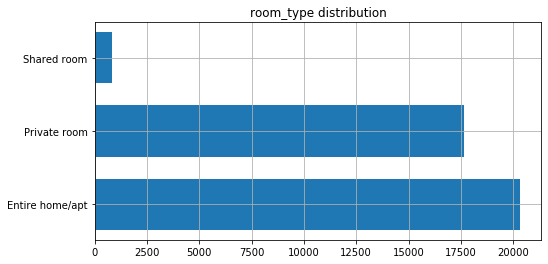

In [18]:
plot_hbar(df, column='room_type')

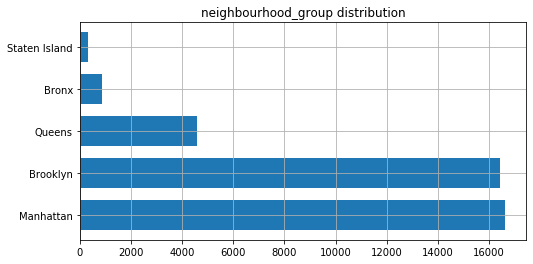

In [19]:
plot_hbar(df, column='neighbourhood_group')

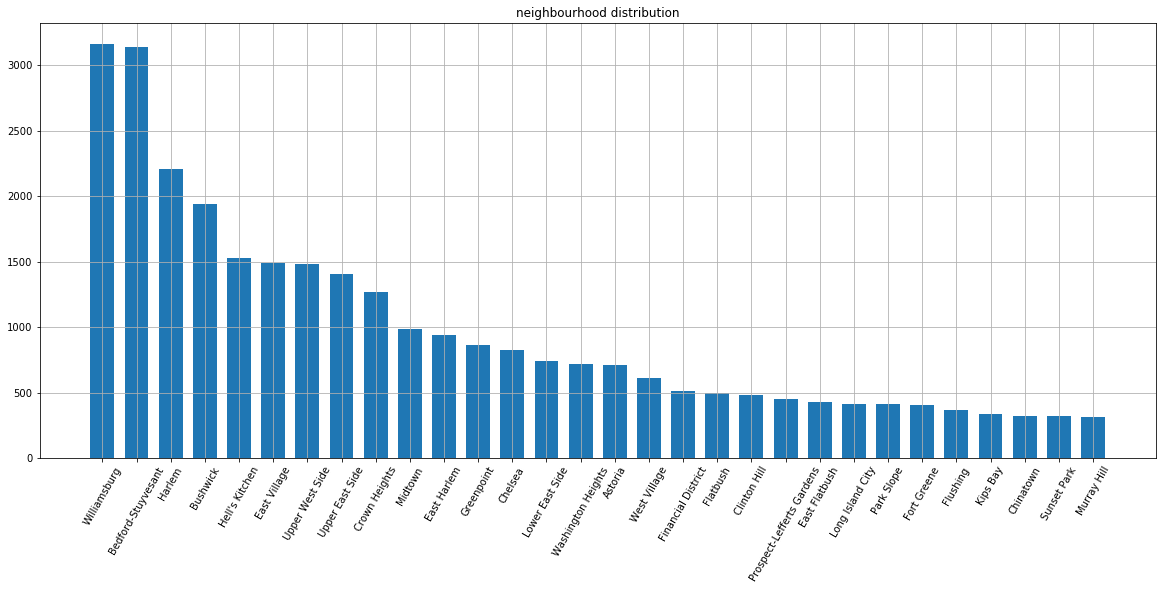

In [20]:
nh_vc = df['neighbourhood'].value_counts()
top_nh = nh_vc[:30]
values = top_nh.index
pos = np.arange(len(values))

plt.figure(figsize=(20, 8))
plt.xticks(pos, values, rotation=60)
plt.bar(values, top_nh, width=0.7)
plt.title('neighbourhood distribution')
plt.grid()

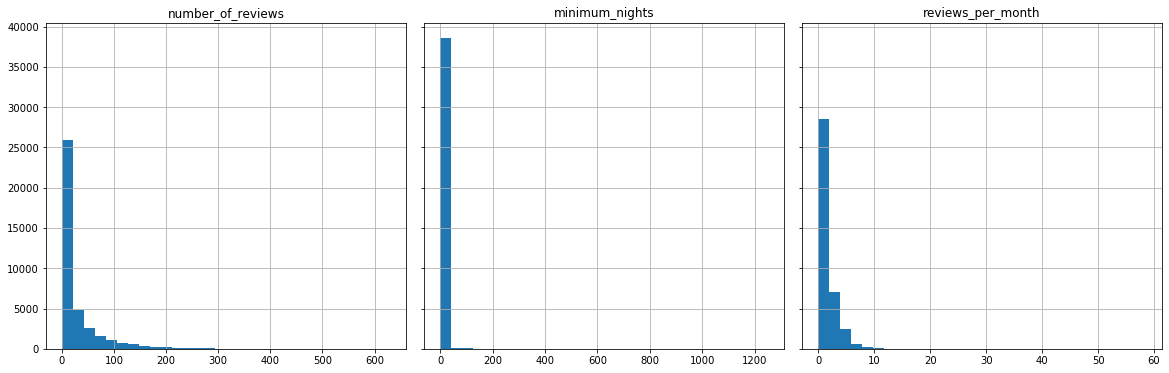

In [21]:
cols_to_hist = ['number_of_reviews', 'minimum_nights',
                'reviews_per_month']

fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
for (col, axis) in zip(cols_to_hist, ax):
    axis.hist(df[col], bins=30)
    axis.set_title(col)
    axis.grid()
    
plt.subplots_adjust(wspace=0.05)

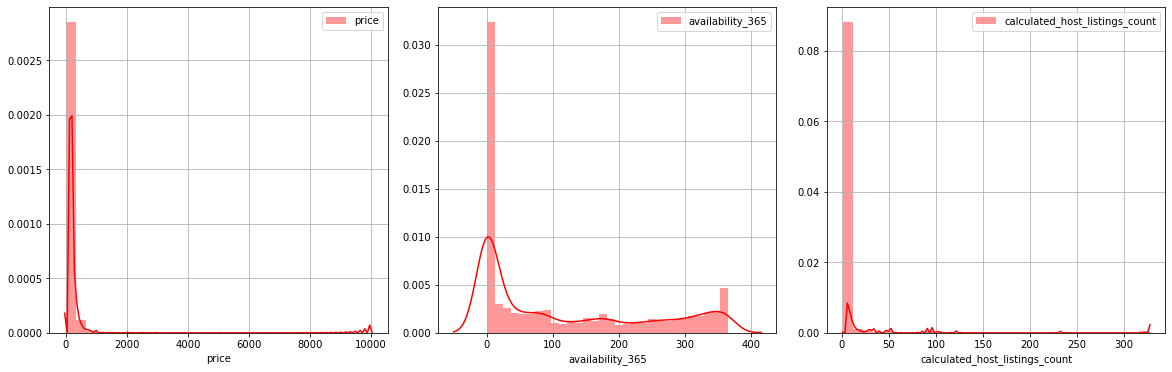

In [22]:
cols_to_dist = ['price', 'availability_365',
                'calculated_host_listings_count']

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for col, axis in zip(cols_to_dist, ax):
    sns.distplot(df[col], bins=30, color='red',
                 label=col, ax=axis)
    axis.legend()
    axis.grid()

plt.subplots_adjust(wspace=0.15)

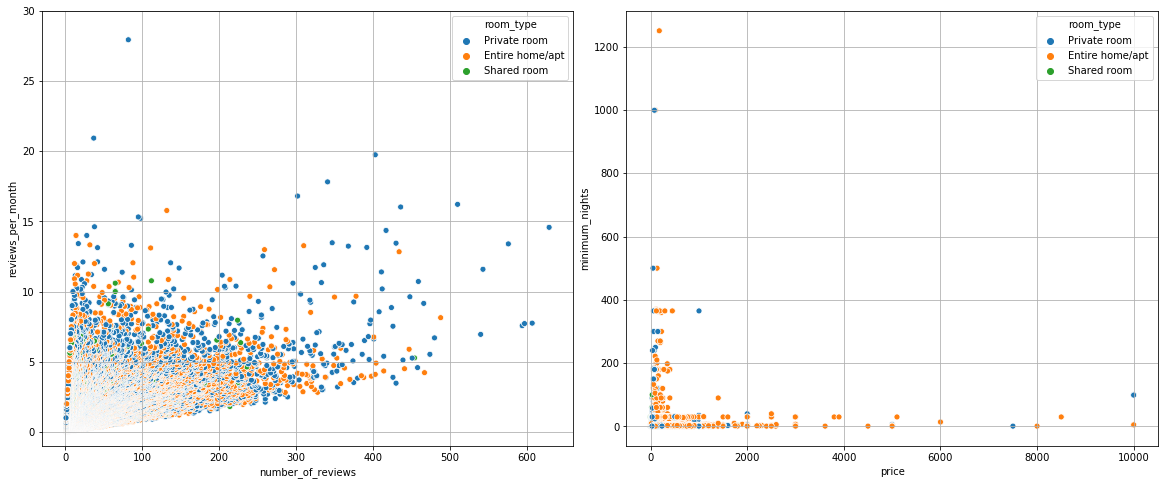

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(df['number_of_reviews'], df['reviews_per_month'],
                ax=ax[0], hue=df['room_type'])
sns.scatterplot(df['price'], df['minimum_nights'],
                ax=ax[1], hue=df['room_type'])

ax[0].grid()
ax[1].grid()
ax[0].set_ylim([-1, 30])
plt.subplots_adjust(wspace=0.1)

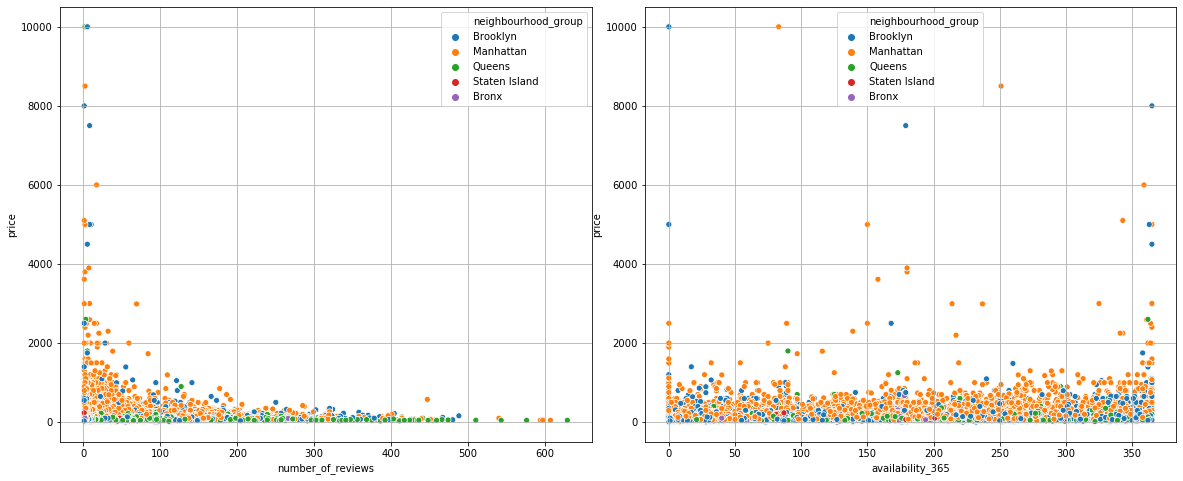

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(df['number_of_reviews'], df['price'],
                ax=ax[0], hue=df['neighbourhood_group'])
sns.scatterplot(df['availability_365'], df['price'],
                ax=ax[1], hue=df['neighbourhood_group'])

ax[0].grid()
ax[1].grid()
plt.subplots_adjust(wspace=0.1)

In [25]:
def extract_date(data):
    return data.dt.year, data.dt.month, data.dt.day

year, month, day = extract_date(df['last_review'])

df[['review_year', 'review_month',
    'review_day']] = pd.DataFrame({'year': year,
                        'month': month,
                        'day': day})

df.drop(columns='last_review', inplace=True)

In [26]:
# FE (1 part)
df[['avg_reviews', 'avg_min_nights',
    'avg_reviews_per_month']] = transf

def diff_avg(group):
    return abs(group - group.mean())

diff_avg = by_nhgroup[
    ['number_of_reviews', 'availability_365']
].apply(diff_avg)
df[['diff_med_reviews', 'diff_med_availability']] = diff_avg

df['year_available'] = df['availability_365'] == 365

df['host_count_mean'] = diff_mean_df['calculated_host_listings_count']

df['review_period'] = df['number_of_reviews'] / df['reviews_per_month']

In [27]:
# FE (2 part)
by_hostname = df.groupby(by='host_name')

def diff_median(group):
    return abs(group - group.median())

diff_med_reviews = by_hostname[
    ['number_of_reviews', 'reviews_per_month']
].apply(diff_median)
df[['reviews_by_hostname',
    'reviews_per_month_by_hostname']] = diff_med_reviews

df['is_rare_type'] = df['room_type'] == 'Private room'

df['reviews_per_host'] = df['number_of_reviews'] / df['calculated_host_listings_count']

df['min_available'] = df['minimum_nights'] * df['availability_365']

In [28]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,diff_med_reviews,diff_med_availability,year_available,host_count_mean,review_period,reviews_by_hostname,reviews_per_month_by_hostname,is_rare_type,reviews_per_host,min_available
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,20.574427,259.152138,True,0.833389,42.857143,0.0,0.535,True,1.5,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,17.677577,245.659888,False,3.166611,118.421053,36.5,0.005,False,22.5,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,240.425573,88.152138,False,4.166611,58.189655,0.0,0.000,False,270.0,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,18.322423,109.340112,False,4.166611,90.000000,3.0,0.300,False,9.0,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,...,46.677577,19.659888,False,4.166611,125.423729,63.0,0.060,False,74.0,387


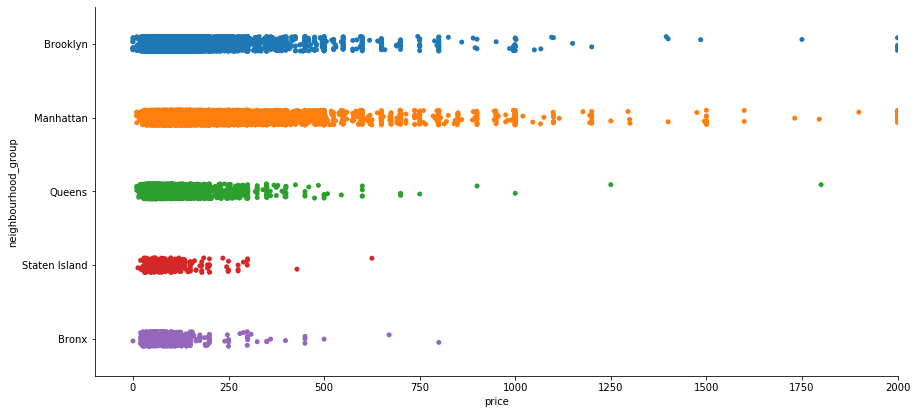

In [29]:
fg = sns.catplot(x='price', y='neighbourhood_group',
                 data=df, orient='h', legend_out=True)
fg.ax.set_xlim([-100, 2000])
fg.fig.set_figwidth(16)
fg.fig.set_figheight(6)

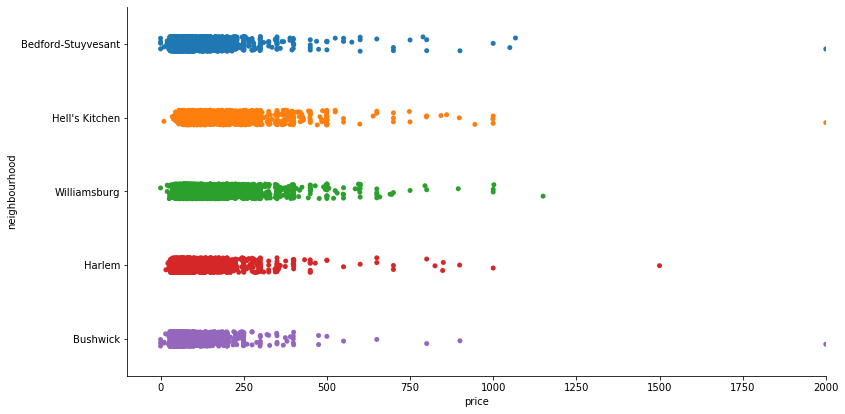

In [30]:
top_nh = nh_vc[:5]
top_nh_df = df[df['neighbourhood'].isin(top_nh.index)]

fg = sns.catplot(x='price', y='neighbourhood',
                 data=top_nh_df, orient='h', legend_out=True)
fg.ax.set_xlim([-100, 2000])
fg.fig.set_figwidth(16)
fg.fig.set_figheight(6)

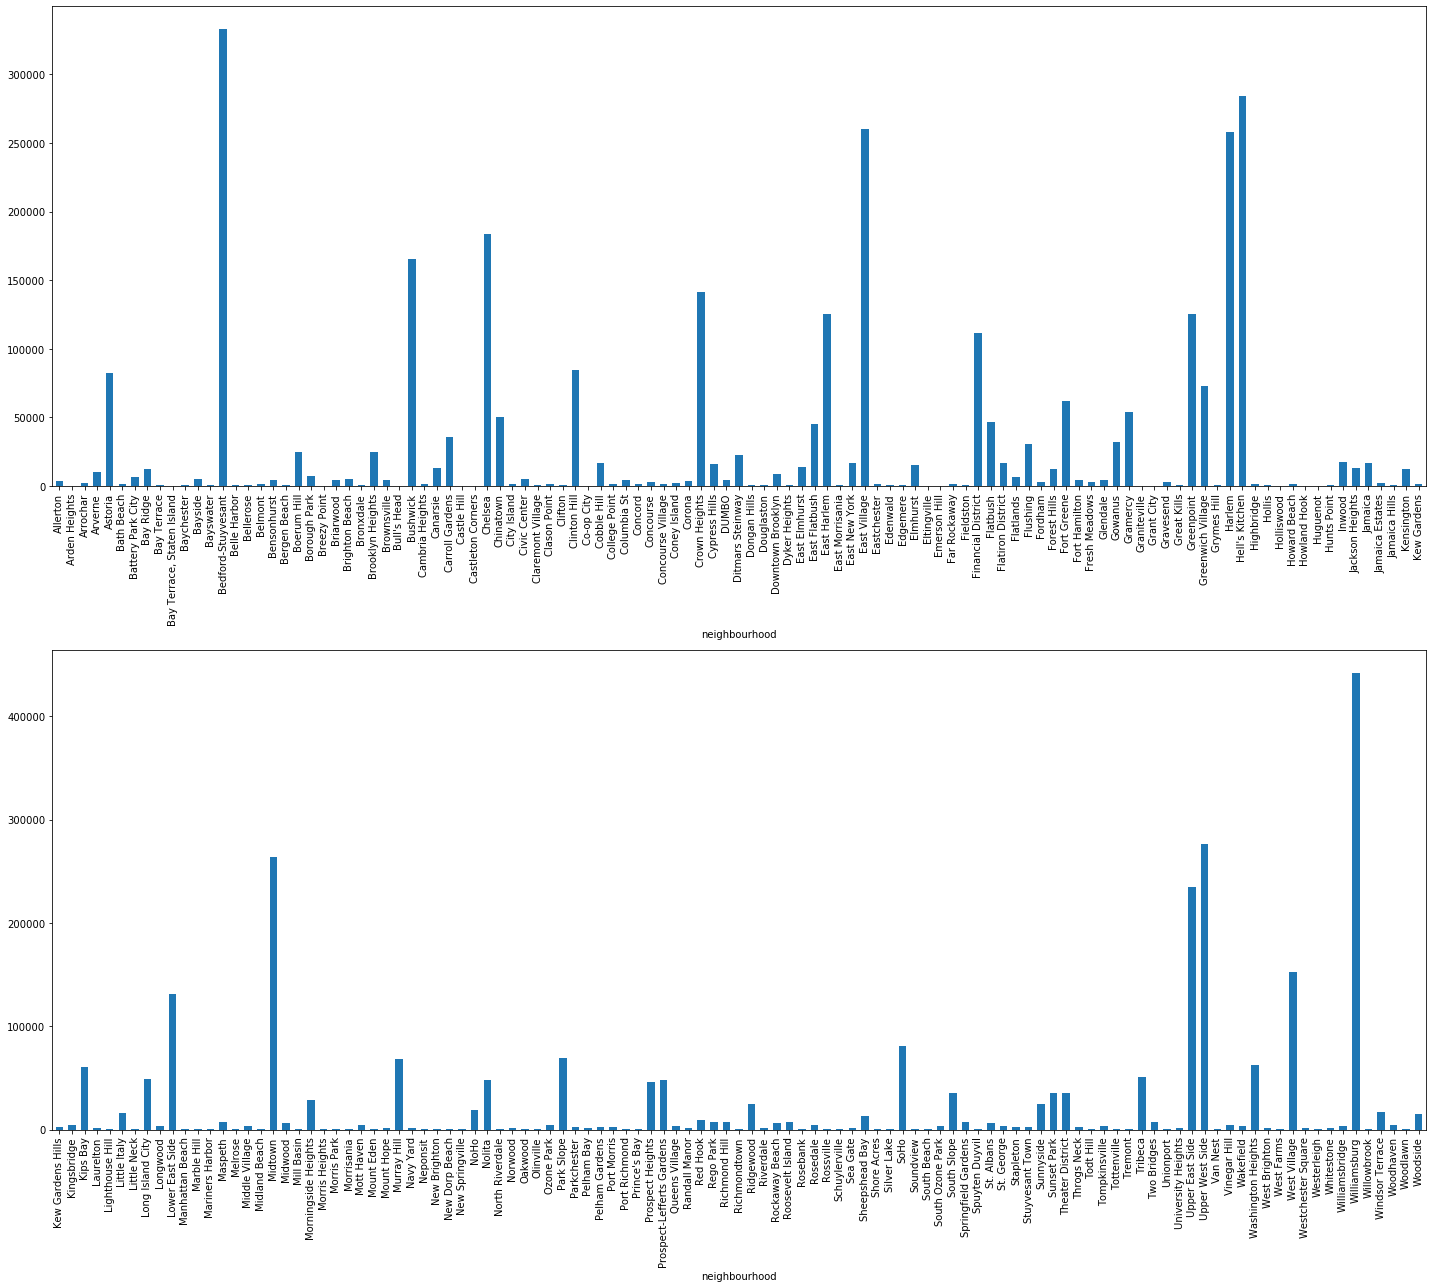

In [31]:
by_nh = df.groupby(by='neighbourhood')

length = len(by_nh) 
first_half_price = by_nh['price'].sum()[:length // 2]
second_half_price = by_nh['price'].sum()[length // 2:]

fig, ax = plt.subplots(2, 1, figsize=(20, 18))
first_half_price.plot(kind='bar', rot=90, ax=ax[0], width=0.6)
second_half_price.plot(kind='bar', rot=90, ax=ax[1], width=0.6)
plt.tight_layout()

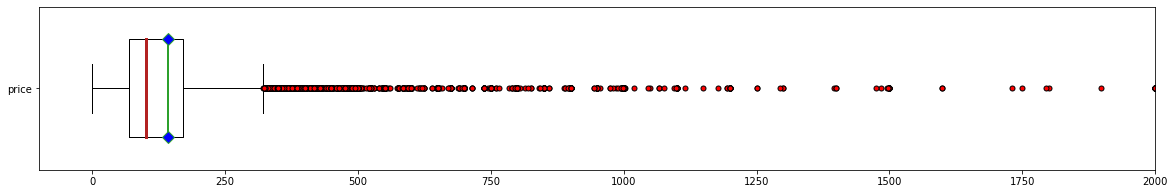

In [32]:
flier_props = {'marker': 'o', 'markerfacecolor': 'red', 'markersize': 5}
median_props = dict(linestyle='-', linewidth=3, color='firebrick')
meanpoint_props = dict(marker='D', markerfacecolor='blue',
                       linestyle='-', linewidth=2, markersize=8)

plt.figure(figsize=(20, 3))
ax = plt.gca()
ax.set_xlim([-100, 2000])

box = plt.boxplot(df['price'], labels=['price'], vert=False,
                  flierprops=flier_props, medianprops=median_props, 
                  meanprops=meanpoint_props, meanline=True,
                  showmeans=True, widths=0.6)

In [33]:
target = df['price']
df.drop(columns=['price'], inplace=True)

In [34]:
# What to do with zero price ?
print(f'There isn"t price in {len(target[target == 0.0])} observations')
target.replace(to_replace=0, value=target.mean(), inplace=True)

There isn"t price in 10 observations


Target skewness: 23.6779
kurtosis: 953.7204


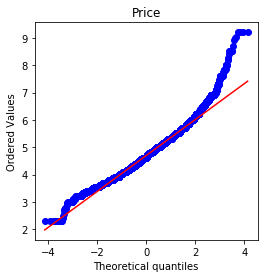

In [35]:
skew = target.skew()
kurt = target.kurtosis()
print(f'Target skewness: {skew:.4f}\nkurtosis: {kurt:.4f}')

# Log-transformation for target normalization
target = np.log(target)

plt.figure(figsize=(4, 4))
stats.probplot(target, plot=plt)
text = plt.title('Price')

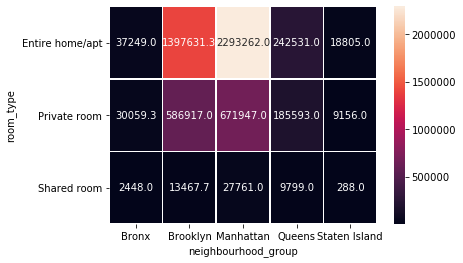

In [36]:
room_nhgroup_pivot = df.pivot_table(index='room_type',
    columns='neighbourhood_group', values='price',
    aggfunc=sum).fillna(0).applymap(float)

ax = sns.heatmap(room_nhgroup_pivot, annot=True,
                 fmt=".1f", linewidths=.5)

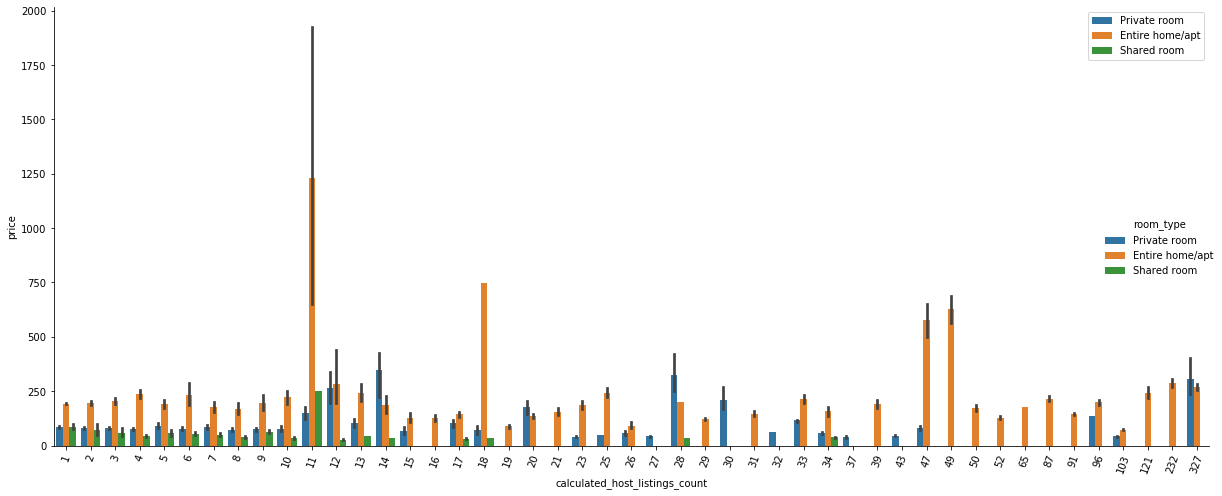

In [73]:
fg = sns.catplot(x='calculated_host_listings_count',
                 y='price', hue='room_type',
                 kind="bar", data=df)
fg.fig.set_figwidth(17)
fg.fig.set_figheight(7)
fg.ax.tick_params(axis='x', rotation=70)
fg.ax.legend(loc='upper right')
plt.tight_layout()

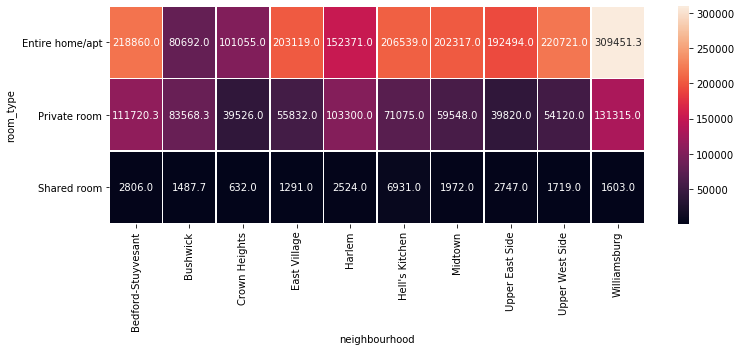

In [38]:
top_nh = nh_vc[:10]
top_nh_df = df[df['neighbourhood'].isin(top_nh.index)]

nh_pivot = top_nh_df.pivot_table(index='room_type',
    columns='neighbourhood', values='price',
    aggfunc=sum).fillna(0).applymap(float)

plt.figure(figsize=(12, 4))
ax = sns.heatmap(nh_pivot, annot=True,
                 fmt=".1f", linewidths=.5)

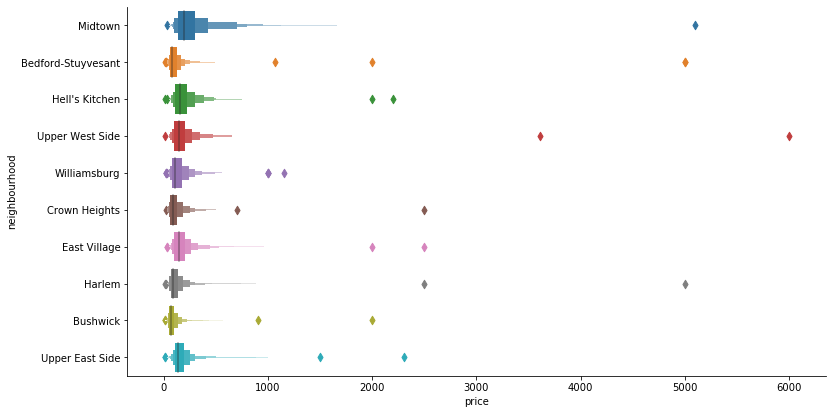

In [39]:
fg = sns.catplot(x='price', y='neighbourhood',
                  kind='boxen', data=top_nh_df, orient='h')
fg.fig.set_figwidth(16)
fg.fig.set_figheight(6)

#### Hypothesis

1. Entire homes/appartments are more expensive than other room types.
   Obviously, shared rooms is most cheap type. Difference in price is very varying depends on region.
2. Manhattan is very very luxury group comparing to others.
   Second place takes Brooklyn.
3. Williamsburg looks like a most expensive neighbourhood.
4. Majority of neighbourhoods have strongly marked values in price, but not Williamsburg.
   It's very notably in luxury neighbourhood groups.
5. Despite the small count of rooms 'shared' type in dataset,
   hosts more willingly make review about this room type. Similar behavior maybe be the consequense
   of almost permanent availability during year.
6. Minimum count of paid nights doesn't have strong influence on price.
   But interesting: people very often paid for 99, 100 nights.